Vous êtes nouvel embauche chez CoolCorp, une startup qui spécialise dans l'analyse des désastres maritimes. Un nouveau client, White Star Lines, se trouve face à un procès à travers le temps, affaire délicat. Votre chef vous demande, en tant que seul data scientist chez CoolCorp, d'analyser les données *.csv. WSL a déjà engagé un expert pour annoter une partie des données (test.csv) avec la survie ou pas des passagers.

In [7]:
import matplotlib

%matplotlib inline

# Learning from Disaster

Source:  [Kaggle competition](https://www.kaggle.com/c/titanic/) on surviving the wreck of the Titanic.


In [8]:
"""
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
"""
True

True

In [9]:
# The first thing to do is to import the relevant packages
# that I will need for my script, 
# these include the Numpy (for maths and arrays)
# and csv for reading and writing csv files
# If i want to use something from this I need to call 
# csv.[function] or np.[function] first

import csv as csv 
import numpy as np

# Open up the csv file in to a Python object
data_all = []
with open('train.csv') as train_file:
    csv_reader = csv.reader(train_file, delimiter=',', quotechar='"')
    for row in csv_reader:
        data_all.append(row)
data_all = np.array(data_all)
data = data_all[1::]

test_all = []
with open('test.csv') as test_file:
    csv_reader = csv.reader(test_file, delimiter=',', quotechar='"')
    for row in csv_reader:
        test_all.append(row)
test_all = np.array(test_all)
test = test_all[1::]

Exercice :
* Regardez les trois dernier rangs.
* Il y a combien de rangs?  Combien de colonnes?


In [10]:
data_all_nbLines = len(data_all)
print('nombre de colonnes : {danl}'.format(danl=(data_all_nbLines-1)))
print(' ')

for numLine in range(data_all_nbLines-3,data_all_nbLines):
    print(data_all[numLine])
    print('nombre de rangs : {nbr}'.format(nbr=len(data_all[numLine-1])))
    print(' ')



nombre de colonnes : 891
 
['889' '0' '3' 'Johnston, Miss. Catherine Helen "Carrie"' 'female' '' '1'
 '2' 'W./C. 6607' '23.45' '' 'S']
nombre de rangs : 12
 
['890' '1' '1' 'Behr, Mr. Karl Howell' 'male' '26' '0' '0' '111369' '30'
 'C148' 'C']
nombre de rangs : 12
 
['891' '0' '3' 'Dooley, Mr. Patrick' 'male' '32' '0' '0' '370376' '7.75' ''
 'Q']
nombre de rangs : 12
 


grace a la fonction _len_ nous pouvons recuperer le nombre de 'ligne' de data_all
nous pouvons alors faire un _for_ sur les 3 dernieres ligne et les afficher. nous remarquon tt de suite que certaine données ne sont pas renseignée (par exemple ligne 889, donnée 5)
on en profite pour afficher le nombre de 'colonnes' (ici 12)

nous pouvons alors associée les valeurs avec les nom de champs exemple pour la ligne 889:
survival        0
pclass          3
name            Johnston, Miss. Catherine Helen "Carrie"
sex             female
age             NaN
sibsp           1
parch           2
ticket          W./C. 6607
fare            23.45
cabin           unknow
embarked        S

Mais même les chiffres sont des strings.
* Il faut parfois convertir en float.
* Quelques fonctions nous rendent des matrices de True/False que nous pouvons alors utiliser pour sélectionner d'autres élements.

In [11]:
# The size() function counts how many elements are in
# in the array and sum() (as you would expects) sums up
# the elements in the array.

number_passengers = np.size(data[0::,1].astype(np.float))
number_survived = np.sum(data[0::,1].astype(np.float))
proportion_survivors = number_survived / number_passengers

women_only_stats = data[0::,4] == "female" # This finds where all 
                                           # the elements in the gender
                                           # column that equals “female”
men_only_stats = data[0::,4] != "female"   # This finds where all the 
                                           # elements do not equal 
                                           # female (i.e. male)

# Using the index from above we select the females and males separately
women_onboard = data[women_only_stats,1].astype(np.float)     
men_onboard = data[men_only_stats,1].astype(np.float)

# Then we finds the proportions of them that survived
proportion_women_survived = \
                       np.sum(women_onboard) / np.size(women_onboard)  
proportion_men_survived = \
                       np.sum(men_onboard) / np.size(men_onboard) 

# and then print it out
print('Proportion of women who survived is {p:.2f}'.format(
        p=proportion_women_survived))
print('Proportion of men who survived is {p:.2f}'.format(
        p=proportion_men_survived))

Proportion of women who survived is 0.74
Proportion of men who survived is 0.19


# Vers pandas

Ça marche quand tout est propre et net, mais la vie ne l'est pas toujours.  Par exemple, qu'est-ce qui ne va pas ici?

In [12]:
data[0,5].astype(np.float)

22.0

certaines valeurs sont a null->not a number... (elles ne sont pas renseignées) donc pas de conversion vers du float!

# Pandas

* Regardez `df`.  Quelles sont les données dedans?  Quelles sont ses méthodes?
* Regardez `df.head()`, `df.types`, `df.info()`, `df.describe()`
* Regardez `df['Age'][0:10]` et `df.Age[0:10]`, `type(df.Age)`

In [13]:
import pandas as pd

# For .read_csv, always use header=0 when you know row 0 is the header row
df = pd.read_csv('train.csv', header=0)

In [14]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [15]:
avec panda, on peux facilement analyser les données !

SyntaxError: invalid syntax (<ipython-input-15-80403ee6b29d>, line 1)

In [ ]:
df.head(8)

la fonction head par defaut retourne les 5 premieres lignes de données (nous pouvons lui donner en param le le nombre de ligne que nous desirons. mais elles ne nous donne pas le nombre de données ou leurs type. pour cela nous utilisons df.info()

In [ ]:
df.info()

grace a info() nous pouvons en savoir plus sur les données , comme leur type... :) le nombre de données -> 891 de 0 à 890

In [ ]:
df.describe()

la fonction describe() est tres interresante, elle donne des statistiques sur les données. nous remarqu'on tout de suite, grace a 'count', que toutes les valeurs sont renseigné sauf les ages: il en manque 177! nous pourons surement donner des aproximation en fonction des autres données... 

l'age minimum des passagers est de 0.42ans et l'age maxi de 80 ans, la moyenne est à ~30 ans
il serait interresant de connaitre le nombre de deces en fonction des tranches d'age.

regarder le nombre de deces en fonction de 'Parch' serait une bonne indication puis en les croisant aussi avec Pclass,
effectivement Parch nous indique le nombre de membre de la famille a bord, donc une indication si les personnes etait en groupe ou non. si le pourcentage de deces suit ll nombre 'parch' nous saurons si parch à de l'influence sur les données, puis les croiser avec Pclass (qui nous donne aussi une indication geographique sur le bateau ( les 1ieres classes etait dans les etages superieur)) 
et ensuite regarder le nombre de deces par classes et on pourra savoir si elle ont de l'influence sur les familles.

le nombres de deces par classes et aussi une bonne indication, les 1iere classes ont-elle plus de chance de survie?


In [16]:
print(df['Age'][0:10])
print(df.Age[0:10])
type(df.Age)

for i in range(1,9):
    print(i)
    print(len(df[ (df['Survived'] == '1') & (df['Age'].astype(float) < (i*10)) & (df['Age'].astype(float) > ((i*10)-10)) ]) / len(df[(df['Age'].astype(float) < (i*10)) & (df['Age'].astype(float) > ((i*10)-10))]))
    


0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64


pandas.core.series.Series

## Series

* `df.Age.mean()`
* `df[['Sex', 'Pclass', 'Age']]`
* `df[df['Age'] > 60]`
* `df[df['Age'] > 60][['Sex', 'Pclass', 'Age', 'Survived']]`
* `df[df['Age'].isnull()][['Sex', 'Pclass', 'Age']]`

In [17]:
df.Age.mean()

29.69911764705882

df.Age.mean() nous donne la moyenne des ages

In [18]:
print(len(df[df['Age'] > 60 ][df['Survived'] > 0 ][['Sex', 'Pclass', 'Age']]))
df[df['Age'] > 60 ][df['Survived'] > 0 ][['Sex', 'Pclass', 'Age']]


5


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


,Sex,Pclass,Age
275,female,1,63.0
483,female,3,63.0
570,male,2,62.0
630,male,1,80.0
829,female,1,62.0


In [19]:
len(df[df['Age'] > 60 ])

22

on remarque ici qu'il y avait seulement 22 passager avait plus de 60 ans et que 5 d'entre eux on survecu.


In [20]:
for i in range(1,4):
    print(i, len(df[ (df['Sex'] == 'male') & (df['Pclass'] == i) ]))

1 122
2 108
3 347


(df['Sex'] == 'male') selectionne les personnes de sexe masculin et  (df['Pclass'] == i) selectionne les personnes qui sont en ieme classe (i=1.2.3) et avec len nous pouvons compter le nombre de personne par classe



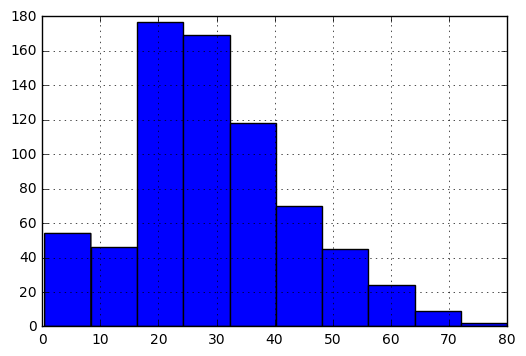

1


C:\Program Files\Anaconda3\lib\site-packages\pandas\core\ops.py:716: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [31]:
import pylab as P
df['Age'].hist()
P.show()

df['Age'].dropna().hist(bins=16, range=(0,80), alpha = .5)
P.show()